In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using automap_base()
Base = automap_base()

# # reflect an existing database into a new model
# Base.metadata.create_all(engine)

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [10]:
# Use inspector to explore data
inspector = inspect(engine)

In [11]:
# Get list of column names & types for measurement.
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get list of column names & types for station.
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database.
    # Latest Date. Aug 23, 2017. Use the year from this date to do query below
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= '2016-08-23').\
                filter(Measurement.date <= '2017-08-23').\
                order_by(Measurement.date).all()
date_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
    # name a new df that will store the results and set_index(date)
prcp_year = pd.DataFrame(date_prcp)
prcp_year.set_index('date')

# Get average precipitation by day
dailyprcp_grouped = prcp_year.groupby('date')
avg_daily_prcp = dailyprcp_grouped.mean()
avg_daily_prcp.head()

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


In [16]:
# Sort the dataframe by date. Seems to be no change from avg_daily_prcp df.
sorted_adp = prcp_year.sort_values('date')
sorted_adp.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


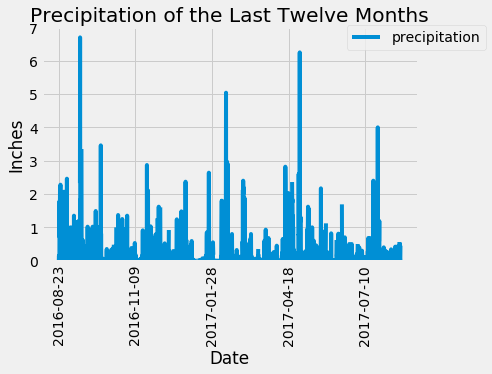

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_adp.plot('date', 'prcp')
plt.ylim(0,7)
plt.xlabel("Date")
plt.ylabel('Inches')
plt.title("Precipitation of the Last Twelve Months")
plt.legend(["precipitation"], bbox_to_anchor=(1.2, 1.04))
plt.xticks(rotation=90)
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_adp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
stations_qty = session.query(Station.station).count()
print(f"There are {stations_qty} stations.")

There are 9 stations.


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stat = session.query(Measurement.station, func.count(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.tobs).desc()).all()
print(f"A list of the most active stations in descending order: ")
for station, count in most_active_stat:
    print(station,"had", count,"observations recorded.")

A list of the most active stations in descending order: 
USC00519281 had 2772 observations recorded.
USC00519397 had 2724 observations recorded.
USC00513117 had 2709 observations recorded.
USC00519523 had 2669 observations recorded.
USC00516128 had 2612 observations recorded.
USC00514830 had 2202 observations recorded.
USC00511918 had 1979 observations recorded.
USC00517948 had 1372 observations recorded.
USC00518838 had 511 observations recorded.


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

USC00519281_min = session.query(Measurement.station, func.min(Measurement.tobs).\
                                   filter(Measurement.station == "USC00519281")).all()
USC00519281_max = session.query(Measurement.station, func.max(Measurement.tobs).\
                                   filter(Measurement.station == "USC00519281")).all()
USC00519281_avg = session.query(Measurement.station, func.avg(Measurement.tobs).\
                                   filter(Measurement.station == "USC00519281")).all()

print("Temperature information about the most active station, USC00519281: ")
print(f"The lowest temprature recorded was {54}°F.")
print(f"The highest temprature recorded was {85}°F.")
print(f"The average temprature recorded was {71.7}°F.")

Temperature information about the most active station, USC00519281: 
The lowest temprature recorded was 54°F.
The highest temprature recorded was 85°F.
The average temprature recorded was 71.7°F.


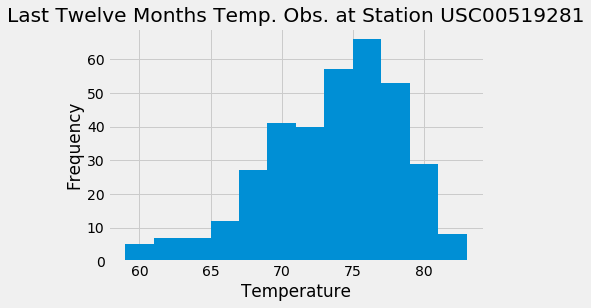

In [22]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station.
tobs = session.query(Measurement.tobs).\
                filter(Measurement.date >= '2016-08-23').\
                filter(Measurement.station == 'USC00519281').\
                order_by(Measurement.date).all() 

# Put the query into a dataframe    
temperature = pd.DataFrame(tobs)

# plot the results as a histogram & add labels
plt.hist(temperature['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Last Twelve Months Temp. Obs. at Station USC00519281")
plt.show()

## Bonus Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Save it to a variable
mytrip_temp = calc_temps('2017-06-20','2017-06-30')

# separate the min, max and avg into their own variables. make start and end date variables too.
tmin = mytrip_temp[0][0]
tmax = mytrip_temp[0][2]
tavg = mytrip_temp[0][1]
start_date = '2017-06-20'
end_date = '2017-06-30'

# Make a statement of the predictions
print(f"My trip is from {start_date} to {end_date}.")
print("Below are some temperature predictions based off of the last twelve months from the data:")
print(f"The lowest temperature during my trip might be: {tmin}")
print(f"The highest temperature during my trip might be: {tmax}")
print(f"The average temperature during my trip might be: {tavg}")

My trip is from 2017-06-20 to 2017-06-30.
Below are some temperature predictions based off of the last twelve months from the data:
The lowest temperature during my trip might be: 71.0
The highest temperature during my trip might be: 82.0
The average temperature during my trip might be: 77.07352941176471


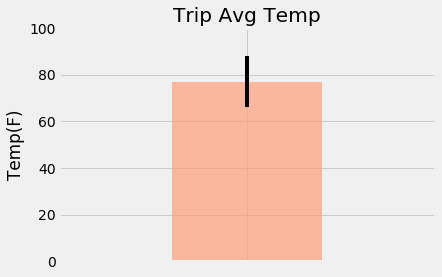

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerrorbar = tmax - tmin
fig, ax = plt.subplots()
ax.bar(1, tavg, color="lightsalmon", tick_label='', yerr=yerrorbar, alpha=0.7)
plt.ylim(0,100)
plt.xlim(0,2)
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
plt.show()

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

# Save the query about station, date, and prcp from measurment table.
prcp_query = session.query(Measurement.prcp, Measurement.date, Measurement.station).\
                filter(Measurement.date >= '2017-06-20').\
                filter(Measurement.date <= '2017-06-30').\
                order_by(Measurement.date).all()

# Save variable to dataframe, clean data and  sort precipitation in descending order.
prcp_df = pd.DataFrame(prcp_query)
clean_prcp = prcp_df.dropna()
prcp_descend = clean_prcp.sort_values(by='prcp', ascending=False)

# Save the query about station, name, latitude, longitude, and elevation from the station table.
station_query = session.query(Station.station, Station.name, Station.latitude, 
                              Station.longitude, Station.elevation).all()

# Save variable to dataframe
station_df = pd.DataFrame(station_query)


#merge station_info & mytrip_prcp
mytrip_weather = pd.merge(prcp_descend, station_df, on='station')
mytrip_weather

,prcp,date,station,name,latitude,longitude,elevation
0,0.50,2017-06-25,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,0.50,2017-06-23,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2,0.31,2017-06-20,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,0.30,2017-06-21,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,0.28,2017-06-22,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
...,...,...,...,...,...,...,...
56,0.00,2017-06-24,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
57,0.00,2017-06-29,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
58,0.00,2017-06-26,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
59,0.00,2017-06-27,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


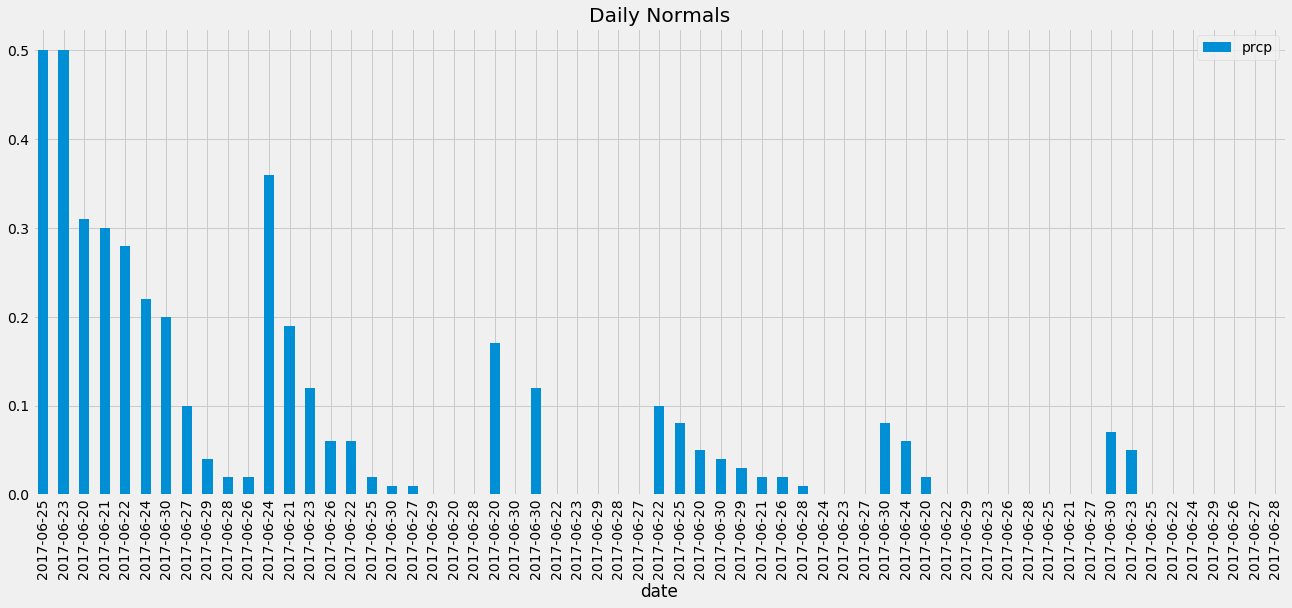

In [31]:
# plot 
mytrip_weather.plot(kind="bar", x="date", y="prcp", grid=True, figsize=(20,8),
              title="Daily Normals")
plt.show()